## 6장 7절 의사결정나무(Decision Tree)

### scikit-learn의 tree.DecisionTreeClassifier

In [1]:
import pandas as pd

df_credit = pd.read_csv('./data/credit_final.csv')
df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [2]:
feature_columns = list(df_credit.columns.difference(['credit.rating']))
X = df_credit[feature_columns]
y = df_credit['credit.rating']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred =clf.predict(X_test)

test_cm = confusion_matrix(y_true=y_test, y_pred=pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도: \t{}%'.format(round(test_acc*100, 2)))
print('정밀도: \t{}%'.format(round(test_prc*100, 2)))
print('재현율: \t{}%'.format(round(test_rcll*100, 2)))
print('F1: \t{}%'.format(round(test_f1*100, 2)))


[[ 28  62]
 [ 27 183]]


정확도: 	70.33%
정밀도: 	74.69%
재현율: 	87.14%
F1: 	80.44%


In [6]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_test, y_pred=pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.31      0.39        90
           1       0.75      0.87      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.70      0.68       300



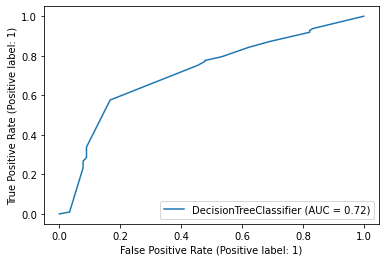

ROC_AUC_score:  0.717857142857143


In [7]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()
R_A_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('ROC_AUC_score: ', R_A_score)

In [8]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,account.balance,0.263282
1,age,0.097293
2,apartment.type,0.048656
3,bank.credits,0.000000
4,credit.amount,0.086741
5,credit.duration.months,0.187908
6,credit.purpose,0.059083
7,current.assets,0.000000
8,dependents,0.000000
9,employment.duration,0.000000


In [9]:
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])

# import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz

dt_dot_data = export_graphviz(clf, feature_names = feature_names, 
                              class_names=target_names, 
                              filled=True, rounded=True, 
                              special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())


InvocationException: GraphViz's executables not found

### scikit-learn의 tree.DecisionTreeRegressor

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

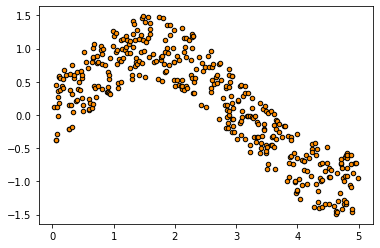

In [11]:
np.random.seed(0)
X = np.sort(5*np.random.rand(400,1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

y[::1] += 1*(0.5-np.random.rand(400))
plt.scatter(X,y, s=20, edgecolor='black', c='darkorange', label='data')

In [18]:
X.size

400

In [22]:
T.size

500

In [20]:
y.size

400

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [24]:
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=5)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

pred_1 = regr1.fit(X_train, y_train).predict(X_test)
pred_2 = regr2.fit(X_train, y_train).predict(X_test)

preds = [pred_1, pred_2]
weights = ['Max_depth 2', 'Max_depth5']
evls = ['mse', 'rmse', 'mae']

df_evals = pd.DataFrame(index = weights, columns = evls)
df_evals

,mse,rmse,mae
Max_depth 2,NaN,NaN,NaN
Max_depth5,NaN,NaN,NaN


In [33]:
for nm, pred in zip(weights, preds):
    mse =mean_squared_error(y_true=y_test, y_pred=pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true = y_test, y_pred = pred)
    
    df_evals.loc[nm]['mse'] = round(mse, 2)
    df_evals.loc[nm]['rmse'] = round(rmse, 2)
    df_evals.loc[nm]['mae']=round(mae, 2)
    
df_evals
    
    

,mse,rmse,mae
Max_depth 2,0.12,0.35,0.29
Max_depth5,0.12,0.35,0.3


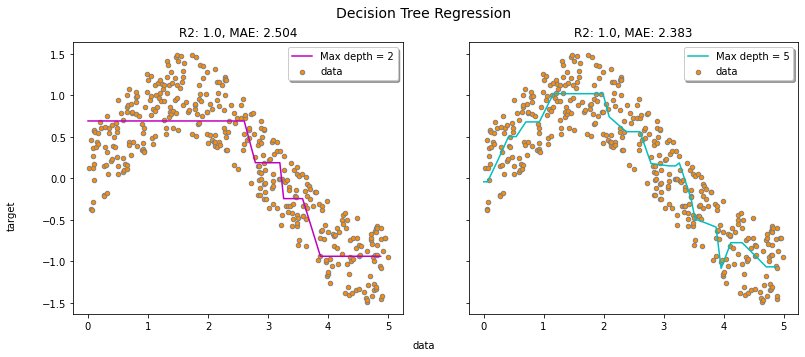

In [40]:
X_test2 = np.sort(5*np.random.rand(40,1), axis=0)

regrs = [regr1, regr2]
depths = ['Max depth = 2', 'Max depth = 5']
model_color = ['m', 'c']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13,5))

for ix, regr in enumerate(regrs):
    pred = regr.predict(X_test2)
    r2 = regr.score(X_test2, pred)
    mae = mean_absolute_error(y_true=X_test2, y_pred=pred)
    
    axes[ix].plot(X_test2, pred, color=model_color[ix], label = '{}'.format(depths[ix]))
    axes[ix].scatter(X,y, s=20, edgecolor = 'gray', c='darkorange', label='data')
    axes[ix].legend(loc='upper right', ncol=1, fancybox=True, shadow=True)
    axes[ix].set_title('R2: {r}, MAE: {m}'.format(r=round(r2,3), m=round(mae,3)))
    
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.4, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Decision Tree Regression', fontsize=14)
plt.show()